Apple Stock Data Analysis and Prediction Model


Importing the necessary libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

Exploring the Dataset

In [12]:
df = pd.read_csv('AAPL.csv') # Load Dataset

df.info()
df.head()

## Statistical summary of the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


Data Wrangling Process

In [13]:
# check for missing values
df.isnull().sum()

# check for duplicate rows
df.duplicated().sum()

# drop duplicate rows
df.drop_duplicates(inplace=True)

# check the data types of the columns
df.dtypes

# convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# set the 'Date' column as the index
#df.set_index('Date', inplace=True)

Features Engineering

In [14]:
def add_features(data):
    # Add day of the week feature
    data['day_of_week'] = data['Date'].dt.dayofweek
    
    # Add month feature
    data['month'] = data['Date'].dt.month
    
    # Add quarter feature
    data['quarter'] = data['Date'].dt.quarter
    
    # Add year feature
    data['year'] = data['Date'].dt.year
    
    # Add week of the year feature
    data['week_of_year'] = data['Date'].dt.isocalendar().week
    
    # Add day of the year feature
    data['day_of_year'] = data['Date'].dt.dayofyear
    
    # Add lagged features
    data['lag_1'] = data['Close'].shift(1)
    data['lag_2'] = data['Close'].shift(2)
    data['lag_3'] = data['Close'].shift(3)
    data['lag_4'] = data['Close'].shift(4)
    data['lag_5'] = data['Close'].shift(5)
    
    return data


# Apply the function to the data
df = add_features(df)

# Drop rows with missing values
df.dropna(inplace=True)

df.head() #Checking to see if the changes were made

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,quarter,year,week_of_year,day_of_year,lag_1,lag_2,lag_3,lag_4,lag_5
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400,4,12,4,1980,51,354,0.118862,0.115513,0.112723,0.121652,0.128348
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200,0,12,4,1980,52,357,0.126116,0.118862,0.115513,0.112723,0.121652
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400,1,12,4,1980,52,358,0.132254,0.126116,0.118862,0.115513,0.112723
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200,2,12,4,1980,52,359,0.137835,0.132254,0.126116,0.118862,0.115513
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400,4,12,4,1980,52,361,0.145089,0.137835,0.132254,0.126116,0.118862


Exploratory Data Analysis

<Figure size 1000x600 with 0 Axes>

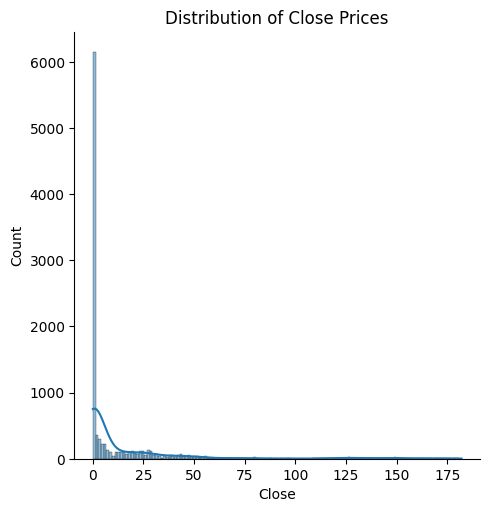

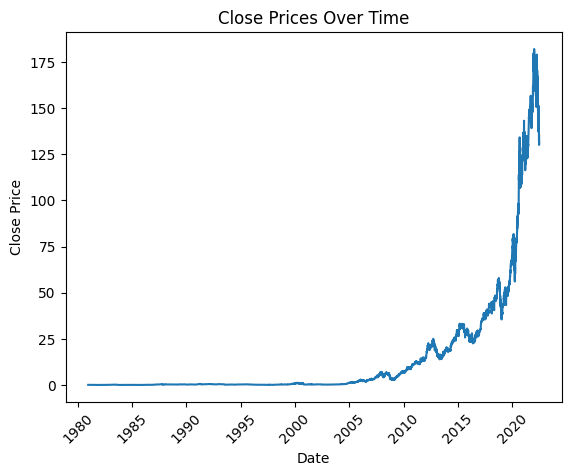

In [15]:
plt.figure(figsize=(10, 6))

# Distribution of the target variable
sns.displot(data=df, x='Close', kde=True)
plt.title('Distribution of Close Prices')
plt.show()

# Line plot of close prices over time
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

Modelling

Linear Regression Model

In [16]:
#Train Test Split
# Define features and target variable
X = df[['Open', 'High', 'Low', 'Volume', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Model:')
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'MAE: {mae_lr:.2f}')
print(f'MAPE: {mape_lr:.2f}%')
print(f'R2 Score: {r2_lr:.2f}\n')

Linear Regression Model:
MSE: 0.06
RMSE: 0.25
MAE: 0.07
MAPE: 0.79%
R2 Score: 1.00



Random Forest Regression Model

In [17]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regression Model:')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAE: {mae_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')
print(f'R2 Score: {r2_rf:.2f}\n')

Random Forest Regression Model:
MSE: 0.13
RMSE: 0.37
MAE: 0.11
MAPE: 0.88%
R2 Score: 1.00

